## 七月在线机器学习实训营三期第八周(深度学习)考试
#### 考试说明:
- 起止时间：请同学在2018年3月30日至4月1日期间完成，最晚提交时间本周日（4月1日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam8后，进行作答。例如wangwei-exam8
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，数据文件，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/8/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>农建华</u>  
- 批改人： David
- 最终得分:90

<center><h1>####答卷开始####</h1></center>
<hr>

## 一、简答题(共10题，1-8题每题5分，最后两题每题10分。共计60分)

- note:50

#### 1.试写您对深度学习的理解，以及它与传统机器学习的关系，相同与不同之处。

- note: 更？

* 对于深度学习，它能够处理数据量很大的信息，更加依赖于硬件的计算能力。与传统的机器学习相比，他们都能对问题进行划分为分类和回归进行处理，都能够对大量的数据进行处理，它们的不同之处在于机器学习的数学逻辑更加的紧密，而对于深度学习，它更像个黑盒子，把数据吃进去以后，进行相应的运算，然后得出结果，我们更

#### 2.简要介绍下您了解的keras框架? 以及进行一个任务的基本流程



* keras是个很易用的深度学习框架，方面实现各式各样的神经网络，搭建神经网络就像搭积木一样简单，所以方面了我们队各种网络的实现，而不必考虑繁杂搭建网络过程。keras是一个站在巨人肩膀上的深度学习框架，其后端可以用不同的DL框架支撑，比如theano，比如Tensorflow，比如微软的CNTK。
* 任务的基本流程：对于Keras框架搭建神经网络有两种方式Sequential/序贯模型和函数式模型；


* 1.Sequential实现方式：这个方式就像搭积木一样，实现的基本过程如下：

##### 1.1 引入库，初始化“模型架子”

In [ ]:
from keras.models import Sequential
model = Sequential()

##### 1.2 通过add来添加层

In [ ]:
# 例如
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
                    Dense(32, units=784),
                    Activation('relu'),Dense(10),Activation('softmax')])

##### 1.3 通过compile来编译模型
* 在这一层主要使用的参数有：优化器optimizer，损失函数loss，指标列表metrics

In [ ]:
# 例如
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

##### 1.4 训练

In [ ]:
# 例如
model.fit(x_train, y_train, epochs=5, batch_size=32)

##### 1.5 在测试集上评估效果

In [ ]:
# 例如
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

##### 1.6 实际预测

In [ ]:
# 例如
classes = model.predict(x_test, batch_size=128)

* 总结：以上就是序贯模型的基本实现方式，通过以上步骤完成模型的训练和预测以后，再通过调参来提高模型的准确率。

* 2.函数式模型实现方式：这个方式实现的过程更加的灵活

In [ ]:
# 例子：
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(784,))

x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data, labels)

* 通过上面的例子可以看出，对于使用函数式实现步骤是先定义需要的网络层，最后使用Model(inputs=inputs, outputs=predictions)定义网络层的开始于结束。最后通过编译等步骤与序贯实现方式是差不多的。

#### 3.工业界在训练深度学习模型时，采用训练方式多为SGD（mini-batch），请简述这种方式较其它方式的优点？

* 对于梯度下降法主要是为了解决梯度的计算，当样本量极大时，梯度计算就变得非常耗时。梯度下降法通常分为三种类型：
* 批梯度下降法(GD)：这个方法会使用全量的数据进行训练；
* 随机梯度下降法（SGD）:每次计算只使用一个样本，避免在类似样本上计算梯度造成的冗余计算，增加了跳出当前局部最小值的潜力，在逐步缩小学习率的情况下，有与批梯度下降法类似的效果；
* 小批量随机梯度下降法(Mini Batch SGD)：每次提低计算使用一个小批量样本，计算比单样本更加稳定，可以很好利用现成的高度优化矩阵运算工具。
* 当数据量极大时候，计算会变得非常的慢，使用全量的数据进行训练也可能会造成局部最优得不到最好的效果，所以使用小批量随机梯度下降法(Mini Batch SGD)能够很好的解决这类问题，达到更好的效果。

#### 4.  请简述神经风格中的BP模型的信号正向传播与误差反向传播的过程？

* BP算法正向传播求损失，反向传播传回误差，根据误差信号修正每一层的权重。对于BP求损失，通过原先给定的参数，把输出的结果与目标进行对比求得误差，对于多层的神经网络，从头到结果事实是个复合函数一层套一层的，可通过每一层的的函数关系求得误差；对于反向传播，其实是对求得的误差进行求导后得到关于W的偏导函数，其实对于某个W的函数偏导求解是一个链式求导的法则，得到关于损失对W的偏导之后，根据一定的学习率通过公式进行参数W的更新。

#### 5.  在什么情况下，会使用到早停法earyly stoping? 使用早停法可以防止什么情况发生？

* 当模型的学习率、损失函数、优化器，还有各种参数都选对了，训练集的效果很好，导师测试集的效果不好，这时候会考虑模型是否发生了过拟合，这时候可以使用early stoping法对过拟合进行处理，防止模型过拟合。
* Early stoping方法：提供一个验证集，盯着验证集的评估效果看，当验证集的评估效果没有发生变化，甚至效果更差了，这时候就使用Early stoping 法停止模型的训练，选取最好的效果。

#### 6.  训练多层神经网络时可以采用哪些方式防止过拟合？

- note:剁成？

* 在剁成神经网络中常用防止过拟合的方式有四种：early stopping（早停法）,Weight Decay(权重衰减)，Dropout(随机失活)，Netword Structure(调整网络结构)。

#### 7.  进行深度学习任务时，使用激活函数是为了解决什么问题？ 常用的激活函数有哪些？

* 激活函数是为了解决非线性的变换，当没有激活函数的时候，它只能进行线性的变换，不过迭代多少轮。
* 常用的激活函数：ReLU,Tanh（双曲正切）,Sigmoid, Leakly ReLU, ELU,Maxout 等

#### 8 . 请简要说明CNN网络的框架结构

* CNN网络的结果大多分为这几层：数据输入层，卷积计算层，激励层，池化层，全连接层。

#### 9.请简述应当从哪些方向上思考和解决深度学习中出现的的over fitting问题？

* 1.从模型的结构上，模型是否太复杂，对模型进行一些调整；
* 2.从数据的角度考虑，是否进行mini-batch的处理；
* 3.从损失函数来看，是否符合场景的设置，进行自定义损失函数，来达到更好的效果；
* 4.从学习率来看，要选择合适的学习率，避免在优化的过程中大幅度的抖动；
* 5.数据是否有大量的噪音，对数据进行相应的处理；
* 6.当学习率，损失函数，优化器等各种参数都选对以后，如果还是过拟合，可以使用early stopping（早停法）,Weight Decay(权重衰减)，Dropout(随机失活)，Netword Structure(调整网络结构)等方式对过拟合进行处理；

#### 10. 谈谈您对深度学习中的自适应学习率的了解

- note:常用的自适应学习率有？

* 学习率对于模型找到优化的方向后，然后按照这个方向走多大的步子往这个方向走，这个多大的步子就是学习率。对于学习率要选择合适的，不然会出现抖动，以至于达不到最好的效果；但也不能选择太小的学习率，这样会很慢的收敛，消耗大量的计算机资源。可以把损失函数优化的结果进行可视化，当看到图像抖动很厉害的时候，说明学习率太大。

## 二、实验题(共1题，共计40分)

- note: 40

### 1. 请使用keras框架，构建CNN网络完成对MNIST数据集的训练，评估及预测

### （1）.CNN网络

In [115]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from keras.utils import np_utils

### 1.1数据处理部分

In [138]:
batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 幅度缩放
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# 对数据进行转换，因为在keras中训练等对数据的数量一般要用numpy.ndarray类型
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


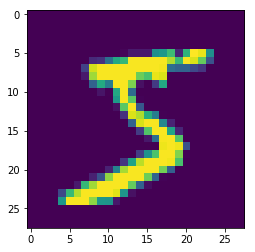

In [139]:
# 查看一下数据
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(x_train[0].reshape(28, 28))

### 1.2 模型部分

In [140]:

# 创建一个系灌模型
model = Sequential()
# 卷积层，3*3的卷积核，后面接激活函数，relu。32个神经元
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
# 池化层
model.add(MaxPooling2D(pool_size=(2, 2)))
# 正则化
model.add(Dropout(0.25))
# 全连接层前面的shape要是n*1的，就是类似向量形式，所以沿展开
model.add(Flatten())
# 全连接
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# 全连接，直接连接到多少个类
model.add(Dense(num_classes, activation='softmax'))

### 1.3 编译
* 告诉他用交叉熵的loss。指定优化器：optimizer=keras.optimizers.Adadelta()，评估的准则：accuracy

In [141]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### 1.4 训练

In [142]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 232s 4ms/step - loss: 0.2492 - acc: 0.9233 - val_loss: 0.0629 - val_acc: 0.9790
Epoch 2/5
60000/60000 [==============================] - 248s 4ms/step - loss: 0.0832 - acc: 0.9748 - val_loss: 0.0379 - val_acc: 0.9879
Epoch 3/5
60000/60000 [==============================] - 244s 4ms/step - loss: 0.0628 - acc: 0.9815 - val_loss: 0.0417 - val_acc: 0.9861
Epoch 4/5
60000/60000 [==============================] - 245s 4ms/step - loss: 0.0514 - acc: 0.9849 - val_loss: 0.0292 - val_acc: 0.9898
Epoch 5/5
60000/60000 [==============================] - 246s 4ms/step - loss: 0.0451 - acc: 0.9862 - val_loss: 0.0316 - val_acc: 0.9888


* 通过以上的结果可以看出，通过CNN网络能够很好的对图像进行识别，准确率很高。

### 1.5 评估

In [143]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0316181664116
Test accuracy: 0.9888


#### 总结：通过CMN网络能够很好的识别手写图像，准确率很高。

### （2）.全连接方式

In [52]:
import numpy as np
import keras
from keras.datasets import mnist
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.optimizers import SGD

* Load the datasets(加载数据)

In [53]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

* 搭建网络

In [54]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

* 对数据进行处理，切分

In [55]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [56]:
# 对数据进行切分
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

* 查看一下数据

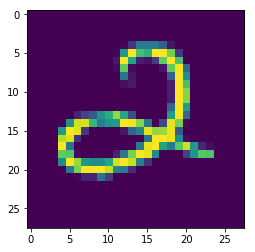

In [57]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(X_train[0].reshape(28, 28))

* Training

In [58]:
# 开始训练
# epochs：表示训练的轮次
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_val, Y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 9s 198us/step - loss: 2.2101 - acc: 0.2601 - val_loss: 2.0789 - val_acc: 0.4550
Epoch 2/20
45000/45000 [==============================] - 9s 196us/step - loss: 1.9618 - acc: 0.5754 - val_loss: 1.8356 - val_acc: 0.6507
Epoch 3/20
45000/45000 [==============================] - 8s 189us/step - loss: 1.7154 - acc: 0.6892 - val_loss: 1.5855 - val_acc: 0.7156
Epoch 4/20
45000/45000 [==============================] - 8s 188us/step - loss: 1.4698 - acc: 0.7398 - val_loss: 1.3489 - val_acc: 0.7616
Epoch 5/20
45000/45000 [==============================] - 8s 168us/step - loss: 1.2500 - acc: 0.7776 - val_loss: 1.1486 - val_acc: 0.7913
Epoch 6/20
45000/45000 [==============================] - 7s 165us/step - loss: 1.0715 - acc: 0.8015 - val_loss: 0.9918 - val_acc: 0.8093
Epoch 7/20
45000/45000 [==============================] - 8s 169us/step - loss: 0.9342 - acc: 0.8176 - val_loss: 0.8728 - 

#### 小总结：通过上面的训练训练集的准确率达到了百分之80多

* 修改以上的模型，再进行训练，看是否会有提高
* 加入Dropout层，为了缓解过拟合

In [59]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

* 加入Dropout后，再次训练

In [60]:
# 开始训练
# epochs：表示训练的轮次
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_val, Y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 12s 264us/step - loss: 2.2197 - acc: 0.2207 - val_loss: 2.0670 - val_acc: 0.5141
Epoch 2/20
45000/45000 [==============================] - 9s 211us/step - loss: 1.9859 - acc: 0.4755 - val_loss: 1.8290 - val_acc: 0.6564
Epoch 3/20
45000/45000 [==============================] - 9s 210us/step - loss: 1.7619 - acc: 0.6060 - val_loss: 1.5901 - val_acc: 0.7253
Epoch 4/20
45000/45000 [==============================] - 9s 209us/step - loss: 1.5383 - acc: 0.6748 - val_loss: 1.3632 - val_acc: 0.7634
Epoch 5/20
45000/45000 [==============================] - 9s 209us/step - loss: 1.3353 - acc: 0.7149 - val_loss: 1.1684 - val_acc: 0.7935
Epoch 6/20
45000/45000 [==============================] - 9s 210us/step - loss: 1.1674 - acc: 0.7451 - val_loss: 1.0122 - val_acc: 0.8133
Epoch 7/20
45000/45000 [==============================] - 10s 219us/step - loss: 1.0314 - acc: 0.7675 - val_loss: 0.8916 

* 再进行修改参数，再训练

In [61]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_val, Y_val))


Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 11s 237us/step - loss: 0.5145 - acc: 0.8550 - val_loss: 0.4340 - val_acc: 0.8833
Epoch 2/20
45000/45000 [==============================] - 10s 230us/step - loss: 0.5064 - acc: 0.8546 - val_loss: 0.4248 - val_acc: 0.8859
Epoch 3/20
45000/45000 [==============================] - 14s 320us/step - loss: 0.4933 - acc: 0.8592 - val_loss: 0.4169 - val_acc: 0.8871
Epoch 4/20
45000/45000 [==============================] - 14s 305us/step - loss: 0.4848 - acc: 0.8617 - val_loss: 0.4094 - val_acc: 0.8883
Epoch 5/20
45000/45000 [==============================] - 13s 279us/step - loss: 0.4762 - acc: 0.8640 - val_loss: 0.4025 - val_acc: 0.8899
Epoch 6/20
45000/45000 [==============================] - 10s 223us/step - loss: 0.4671 - acc: 0.8665 - val_loss: 0.3962 - val_acc: 0.8903
Epoch 7/20
45000/45000 [==============================] - 10s 216us/step - loss: 0.4649 - acc: 0.8653 - val_loss: 0.

#### 小总结：通过对模型加入Dropout后，准确率有所提高

### 总结：通过以上两种方式对手写数字进行识别可以看出，通过CNN网络模型能够更加准确的，效果更好。

### 本阶段课程意见反馈题(非必答，不送分)
#### 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。


In [ ]:
不足：对深度学习优化的知识还不了解；不知道如何搭建更好的网络；对于深度学习执行的过程不是很了解；不知道如何运用别人训练好的网络。
困惑：不知道怎么调参；不知道如何搭建更好的网络。

- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

<hr>
<center><h1>####答卷结束####</h1></center>